In [ ]:
import pandas as pd
df = pd.read_csv('Cleaned_tweets.csv')
df.head()


,Unnamed: 0,Key Word,Username,User_ID,Datetime,Favorite_count,Geo,Coordinates,Label,Text,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,704,ass,DeborahParr,1.330000e+18,11-11-2020 06:56,0,NaN,NaN,1,He’d have my phone wedged up his ass sideways.,NaN,NaN,NaN
1,1915,boobies,MaxZorin85,1.330000e+18,11-11-2020 07:35,4,NaN,NaN,0,Yep 100% agree and the same with severine in s...,NaN,NaN,NaN
2,2856,eat pussy,PRISJ1_,1.330000e+18,11-11-2020 10:36,0,NaN,NaN,1,Stop having sex with men that won’t eat your p...,NaN,NaN,NaN
3,2163,Breast Man,Teresamckenzy1,1.330000e+18,10-11-2020 20:52,0,NaN,NaN,1,"When you see a sad man, just give him breast t...",NaN,NaN,NaN
4,2852,eat pussy,sj__vazquez,1.330000e+18,11-11-2020 10:42,0,NaN,NaN,1,We can't be together if you don't eat pussy,NaN,NaN,NaN


In [ ]:
del df['Username']
del df['Key Word']
del df['User_ID']
del df['Datetime']
del df['Favorite_count']
del df['Geo']
del df['Coordinates']
del df['Unnamed: 11']
del df['Unnamed: 9']
del df['Unnamed: 10']
df.columns = ['Unnamed','Label', 'Text']
del df['Unnamed']
df.head()

,Label,Text
0,1,He’d have my phone wedged up his ass sideways.
1,0,Yep 100% agree and the same with severine in s...
2,1,Stop having sex with men that won’t eat your p...
3,1,"When you see a sad man, just give him breast t..."
4,1,We can't be together if you don't eat pussy


In [ ]:
import nltk
import inflect
from bs4 import BeautifulSoup
import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas
def normalize_text(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = lemmatize_verbs(words)
    return words

print("remove_non_ascii results: ", remove_non_ascii(['h', 'ॐ', '©', '1']))
print("to_lowercase results: ", to_lowercase(['HELLO', 'hiDDen', 'wanT', 'GOING']))
print("stem_words results: ", stem_words(['beautiful', 'flying', 'waited']))
print("lemmatize_verbs results: ", lemmatize_verbs(['hidden', 'walking', 'ran']))
print("normalize_text results: ", normalize_text(['hidden', 'in', 'the', 'CAVES', 'he', 'WAited', '2', 'ॐ', 'hours!!']))


remove_non_ascii results:  ['h', '', '', '1']
to_lowercase results:  ['hello', 'hidden', 'want', 'going']
stem_words results:  ['beauty', 'fly', 'wait']
lemmatize_verbs results:  ['hide', 'walk', 'run']
normalize_text results:  ['hide', 'in', 'the', 'cave', 'he', 'wait', '2', '', 'hours!!']


In [ ]:
nltk.download('punkt')
def tokenize(text):
    return nltk.word_tokenize(text)

sample_text = 'he did not say anything  about what is going to  happen'
print("tokenize results :", tokenize(sample_text))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
tokenize results : ['he', 'did', 'not', 'say', 'anything', 'about', 'what', 'is', 'going', 'to', 'happen']


In [ ]:
def text_prepare(text):
    text = ' '.join([x for x in normalize_text(tokenize(text))])
    return text
df['Text'] = [text_prepare(x) for x in df['Text']]
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])
df.head()

,Label,Text
0,1,he d have my phone wedge up his ass sideways .
1,0,yep 100 % agree and the same with severine in ...
2,1,stop have sex with men that win t eat your pu...
3,1,"when you see a sad man , just give him breast ..."
4,1,we ca n't be together if you do n't eat pussy


In [ ]:
#model building

from keras.layers import Dropout, Dense, Embedding, LSTM, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn.metrics import matthews_corrcoef, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.utils import shuffle
import numpy as np
import pickle
import matplotlib.pyplot as plt
import warnings
import logging
logging.basicConfig(level=logging.INFO)

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-04-01 20:52:50--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-04-01 20:52:50--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-04-01 20:52:51--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
def prepare_model_input(X_train, X_test,MAX_NB_WORDS=75000,MAX_SEQUENCE_LENGTH=500):
    np.random.seed(7)
    text = np.concatenate((X_train, X_test), axis=0)
    text = np.array(text)
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index
    text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('Found %s unique tokens.' % len(word_index))
    indices = np.arange(text.shape[0])
    text = text[indices]
    print(text.shape)
    X_train_Glove = text[0:len(X_train), ]
    X_test_Glove = text[len(X_train):, ]
    embeddings_dict = {}
    f = open("glove.6B.50d.txt", encoding="utf8")
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
        except:
            pass
        embeddings_dict[word] = coefs
    f.close()
    print('Total %s word vectors.' % len(embeddings_dict))
    return (X_train_Glove, X_test_Glove, word_index, embeddings_dict)

x_train_sample = ["Lorem Ipsum is simply dummy text of the printing and typesetting industry", "It is a long established fact that a reader will be distracted by the readable content of a page when looking at its layout"]
x_test_sample = ["I’m creating a macro and need some text for testing purposes", "I’m designing a document and don’t want to get bogged down in what the text actually says"]
X_train_Glove_s, X_test_Glove_s, word_index_s, embeddings_dict_s = prepare_model_input(x_train_sample, x_test_sample, 100, 20)
print("\n X_train_Glove_s \n ", X_train_Glove_s)
print("\n X_test_Glove_s \n ", X_test_Glove_s)
print("\n Word index of the word testing is : ", word_index_s["testing"])
print("\n Embedding for thw word want \n \n", embeddings_dict_s["want"])

Found 51 unique tokens.
(4, 20)
Total 400000 word vectors.

 X_train_Glove_s 
  [[ 0  0  0  0  0  0  0  0  8  9  5 10 11  2  6  3 12  4 13 14]
 [17 18 19  1 20 21 22 23 24  3 25 26  6  1 27 28 29 30 31 32]]

 X_test_Glove_s 
  [[ 0  0  0  0  0  0  0  0  0  7 33  1 34  4 35 36  2 37 38 39]
 [ 0  0  0  7 40  1 41  4 42 43 44 45 46 47 48 49  3  2 50 51]]

 Word index of the word testing is :  38

 Embedding for thw word want 
 
 [ 0.13627  -0.054478  0.3703   -0.41574   0.60568  -0.42729  -0.50151
  0.35923  -0.49154   0.21827  -0.15193   0.52536  -0.24206   0.023875
  0.8225    1.089     0.98825  -0.17803   0.77806  -1.0647   -0.28742
  0.50458   0.21612   0.65681   0.34295  -2.1084   -0.82557  -0.31966
  0.87567  -1.0679    3.3802    1.2084   -1.272    -0.15921  -0.25237
 -0.2696   -0.18756  -0.35523   0.084172 -0.56539  -0.24081   0.15926
  0.3287    0.54591   0.29897   0.18948  -0.57113   0.17399  -0.19338
  0.51921 ]


In [ ]:
def build_bilstm(word_index, embeddings_dict, nclasses,  MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=50, dropout=0.5, hidden_layer = 3, lstm_node = 32):
    model = Sequential()
    embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
    for word, i in word_index.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            if len(embedding_matrix[i]) != len(embedding_vector):
                print("could not broadcast input array from shape", str(len(embedding_matrix[i])),
                      "into shape", str(len(embedding_vector)), " Please make sure your"
                                                                " EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector
            

    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))

    for i in range(0,hidden_layer):
        
        model.add(Bidirectional(LSTM(lstm_node, return_sequences=True, recurrent_dropout=0.2)))
    
        model.add(Dropout(dropout))
    model.add(Bidirectional(LSTM(lstm_node, recurrent_dropout=0.2)))
    model.add(Dropout(dropout))
   
    model.add(Dense(256, activation='relu'))
    
    model.add(Dense(nclasses, activation='softmax'))
  
    model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])
    return model

In [ ]:
X = df.Text
y = df.Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("Preparing model input ...")
X_train_Glove, X_test_Glove, word_index, embeddings_dict = prepare_model_input(X_train,X_test)
print("Done!")
print("Building Model!")
model = build_bilstm(word_index, embeddings_dict, 2)
model.summary()

Preparing model input ...
Found 6572 unique tokens.
(3604, 500)
Total 400000 word vectors.
Done!
Building Model!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 50)           328650    
_________________________________________________________________
bidirectional (Bidirectional (None, 500, 64)           21248     
_________________________________________________________________
dropout (Dropout)            (None, 500, 64)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 500, 64)           24832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 64)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 500, 64)           24832     
_________

In [ ]:
history = model.fit(X_train_Glove, y_train,
                           validation_data=(X_test_Glove,y_test),
                           epochs=5,
                           batch_size=128,
                           verbose=1)

Epoch 1/5
23/23 [==============================] - 143s 5s/step - loss: 0.6881 - accuracy: 0.5295 - val_loss: 0.6783 - val_accuracy: 0.5770
Epoch 2/5
23/23 [==============================] - 117s 5s/step - loss: 0.6762 - accuracy: 0.5890 - val_loss: 0.6699 - val_accuracy: 0.6019
Epoch 3/5
23/23 [==============================] - 119s 5s/step - loss: 0.6672 - accuracy: 0.6054 - val_loss: 0.6186 - val_accuracy: 0.6546
Epoch 4/5
23/23 [==============================] - 118s 5s/step - loss: 0.6058 - accuracy: 0.6759 - val_loss: 0.5756 - val_accuracy: 0.7087
Epoch 5/5
23/23 [==============================] - 118s 5s/step - loss: 0.5734 - accuracy: 0.6928 - val_loss: 0.5385 - val_accuracy: 0.7129


In [23]:
y_pred = model.predict(X_test_Glove)

In [31]:
y_pred

array([[0.60020655, 0.39979348],
       [0.25352612, 0.7464739 ],
       [0.67543584, 0.3245641 ],
       ...,
       [0.56936604, 0.43063387],
       [0.10554519, 0.89445484],
       [0.81486213, 0.18513784]], dtype=float32)

In [44]:
y_p=[]
for i in range(len(y_pred)):
  y_p.append(y_pred[i][1])
y_p=np.array(y_p)

In [45]:
y_t=np.array(y_test)

In [46]:
from sklearn.metrics import f1_score
print(f1_score(y_t, y_p.round(), average='macro'))
print(f1_score(y_t, y_p.round(), average='micro'))
print(f1_score(y_t, y_p.round(), average='weighted'))
print(f1_score(y_t, y_p.round(), average=None))
print(f1_score(y_t, y_p.round(), zero_division=1))

0.7119212009025686
0.7128987517337032
0.7108272749724893
[0.72870249 0.69513991]
0.6951399116347571


In [47]:
from sklearn.metrics import recall_score
print(recall_score(y_t, y_p.round(), average='macro'))
print(recall_score(y_t, y_p.round(), average='micro'))
print(recall_score(y_t, y_p.round(), average='weighted'))
print(recall_score(y_t, y_p.round(), average=None))
print(recall_score(y_t, y_p.round(), average=None, zero_division=1))

0.7197545746785361
0.7128987517337032
0.7128987517337032
[0.82492582 0.61458333]
[0.82492582 0.61458333]


In [48]:
from sklearn.metrics import precision_score
print(precision_score(y_t, y_p.round(), average='macro'))
print(precision_score(y_t, y_p.round(), average='micro'))
print(precision_score(y_t, y_p.round(), average='weighted'))
print(precision_score(y_t, y_p.round(), average=None))
print(precision_score(y_t, y_p.round(), average=None, zero_division=1))

0.7262910798122066
0.7128987517337032
0.7310959608785399
[0.65258216 0.8       ]
[0.65258216 0.8       ]


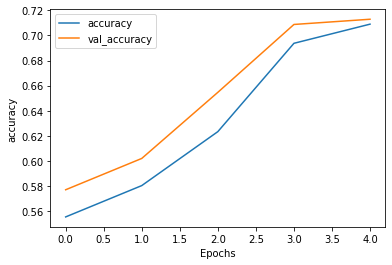

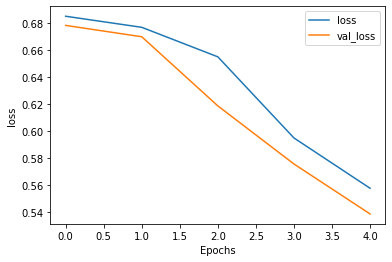

In [49]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [50]:
test_performance=model.evaluate(X_test_Glove,y_test)
print((test_performance))
print("The loss of the model on the test set : {}".format(test_performance[0]))
print("The accuracy of the model on the test set : {}%".format(test_performance[1]*100))

23/23 [==============================] - 9s 390ms/step - loss: 0.5385 - accuracy: 0.7129
[0.5385189652442932, 0.7128987312316895]
The loss of the model on the test set : 0.5385189652442932
The accuracy of the model on the test set : 71.28987312316895%
